## Installation Process for Theano and Keras

- Theano installation steps are based on [CentOS 6 Installation Guide](http://deeplearning.net/software/theano_versions/dev/install_centos6.html)
- Keras installation steps are based on [Keras Frontpage](https://keras.io/)

### Theano

Requirements:
- Python 2.6+ or 3.3+
- NumPy >=1.7.1 <1.11.1
- SciPy >=0.11 <0.17.1
- BLAS installation (MKL)

Optionals:
- python-dev, g++ >= 4.2
- nose >= 1.3.0
- Sphinx >= 0.5.1
- pydot-ng
- NVIDIA CUDA drivers and SDK
- libgpuarray

In [2]:
import numpy
print(numpy.__version__)
import scipy
print(scipy.__version__)
import nose
print(nose.__version__)
import sphinx
print(sphinx.__version__)
import mkl
print(mkl.__version__)

1.10.4
0.17.0
1.3.7
1.3.5
1.1.2


In [8]:
!pip install --user pydot_ng

  Running setup.py bdist_wheel for pydot-ng ... - \ done
  Stored in directory: /home/lngo/.cache/pip/wheels/4f/09/d5/f96fd2578831e1b9021c634f057ab5306a3e4287efa800de29
Successfully built pydot-ng


In [12]:
# Use bleeding-edge installation
!pip install --user --no-deps git+https://github.com/Theano/Theano.git#egg=Theano

  Cloning ssh://git@github.com/Theano/Theano.git to /local_scratch/pbs.4812982.pbs02/pip-build-56sh0e11/Theano
  Running setup.py install for Theano ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done


The following steps must be done after Theano installation:

- Create a file named *.theanorc* file and include the following lines:
```
[global]
gcc.cxxflags="-march=core2"
```

** Skip libgpuarray, it will take time to set up and figure out how to include GPU acceleration **

### Keras

Keras uses the following dependencies:

- NumPy
- SciPy
- pyyaml
- HDF5 and h5py (optional, required if you use model saving/loading functions)

Optional but recommended if you use CNNs: 
- cuDNN *(not needed, this is for GPU acceleration)*

In [3]:
import yaml
print (yaml.__version__)
import h5py
print (h5py.__version__)

3.11
2.5.0


In [14]:
!pip install --user keras

    100% |████████████████████████████████| 143kB 277kB/s 
  Running setup.py bdist_wheel for keras ... - \ done
  Stored in directory: /home/lngo/.cache/pip/wheels/60/d4/f6/c2142843a29a0468324c045fcbe9e9c5cea6c7b3ae093e36b7
Successfully built keras


## Example

Taken from http://machinelearningmastery.com

In [11]:
!wget 
https://raw.githubusercontent.com/
    linhbngo/installation/master/pima-indians-diabetes.csv

--2016-08-31 14:08:27--  http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data
Resolving archive.ics.uci.edu... 128.195.10.249
Connecting to archive.ics.uci.edu|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23279 (23K) [text/plain]
Saving to: “pima-indians-diabetes.data”

100%[======================================>] 23,279      24.0K/s   in 0.9s    

2016-08-31 14:08:28 (24.0 KB/s) - “pima-indians-diabetes.data” saved [23279/23279]



In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
import matplotlib.pyplot as plt
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

Using Theano backend.


In [2]:
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [3]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

In [4]:
# Compile model
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [5]:
# Fit the model
history = model.fit(X, Y, 
                    validation_split=0.33, 
                    nb_epoch=150, 
                    batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


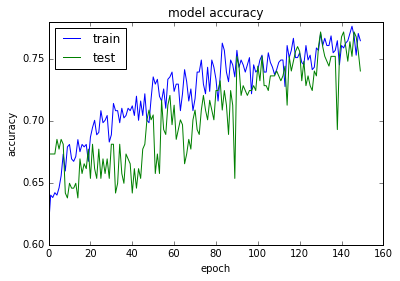

In [6]:
%matplotlib inline
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

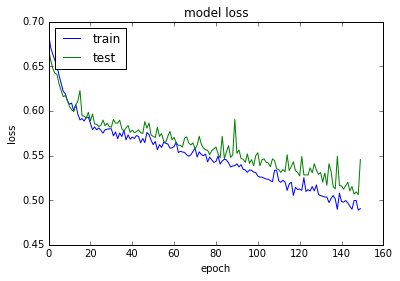

In [7]:
%matplotlib inline
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()